<a href="https://colab.research.google.com/github/sheemasiddiqui/Thesis_Data/blob/main/Final_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

#load csv file
url = 'https://raw.githubusercontent.com/sheemasiddiqui/Thesis_Data/main/thesis_data.csv'
df = pd.read_csv(url)
df.head()

,Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Satisfied with living conditions,...,Anxiety symptoms,Panic attack symptoms,Depressive symptoms,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Binge drinking,Marijuana use,Other recreational drugs
0,20 and more,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,no,no,no,no,no or occasionally,no,no,no
1,19,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,no,regularly,occasionally to regularly,occasionally,no or occasionally,no,no,no
2,20 and more,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,yes,no,no,occasionally,no or occasionally,no,no,no
3,19,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,no,no,no,occasionally,no or occasionally,no,no,no
4,18,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,no,no,no,no,no or occasionally,no,no,no


In [ ]:
df.shape

(4184, 62)

# Unbalanced data with respect to Target Variable -> Anxiety

In [ ]:
#Finding percent of Yes and Nos
print("Anxiety Column")
print("No : %s " %str(len(df[df['Anxiety symptoms'] == 'no'])/len(df)*100), "%")
print("Yes : %s " %str(len(df[df['Anxiety symptoms'] == 'yes'])/len(df)*100), "%")

print("\nFrench Nationality Column")
#Finding percent of Yes and Nos
print("No : %s " %str(len(df[df['French nationality'] == 'no'])/len(df)*100), "%")
print("Yes : %s " %str(len(df[df['French nationality'] == 'yes'])/len(df)*100), "%")

print("\nThe total number of samples in French Nationality is", df['French nationality'].value_counts())

Anxiety Column
No : 92.42351816443595  %
Yes : 7.576481835564053  %

French Nationality Column
No : 7.648183556405354  %
Yes : 92.35181644359464  %

The total number of samples in French Nationality is yes    3864
no      320
Name: French nationality, dtype: int64


# Finding Missing Values

In [ ]:
#Printing columns with missing values
print("Missing Values : %s" %str((df.isnull().sum())/len(df)*100))

Missing Values : Age (4 levels)               0.000000
Gender                       0.000000
French nationality           0.000000
Field of study               0.000000
Year of university           0.000000
                              ...    
Drinker (3 levels)           0.191205
Drinker (2 levels)           0.191205
Binge drinking               0.000000
Marijuana use               13.575526
Other recreational drugs    30.425430
Length: 62, dtype: float64


# Feature Selection

In [ ]:
#-----------------------------------------Starting feature selection---------------------------------------#

#Step 1 : Dropping the columns that have no relation wwith the target column including including lifestyle changes 
no_relat_df = df.drop(['Year of university','French nationality', 'Field of study', 'Learning disabilities', 'Financial difficulties', 'Public health insurance ',
                        'Difficulty memorizing lessons', 'Professional objective',
                        'Informed about opportunities', 'Living with a partner/child', 'Siblings', 'At least one parent unemployed', 'Grant',
                        'Additional income', 'C.M.U.', 'Irregular rhythm of meals', 'Unbalanced meals',
                        'Eating junk food', 'On a diet', 'Irregular rhythm or unbalanced meals',
                        'Physical activity(3 levels)', 'Physical activity(2 levels)', 'Overweight and obesity',
                        'Distant visual acuity of right eye (score /10)', 'Distant visual acuity of left eye (score /10)', 'Close visual acuity of right eye (score /10)',
                        'Close visual acuity of left eye (score /10)', 'Decreased in distant visual acuity', 'Decreased in close visual acuity',
                        'Urinalysis (glycosuria)','Urinalysis (proteinuria)', 'Urinalysis (hematuria)', 'Urinalysis leukocyturia)',
                        'Urinalysis (positive nitrite test)', 'Abnormal urinalysis', 'Control examination needed', 'Depressive symptoms', 'Panic attack symptoms', 'Binge drinking'], axis=1)

no_relat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age (4 levels)                    4184 non-null   object 
 1   Gender                            4184 non-null   object 
 2   Satisfied with living conditions  3670 non-null   object 
 3   Parental home                     3470 non-null   object 
 4   Having only one parent            4124 non-null   object 
 5   Long commute                      3248 non-null   object 
 6   Mode of transportation            3064 non-null   object 
 7   Private health insurance          4182 non-null   object 
 8   Weight (kg)                       3994 non-null   float64
 9   Height (cm)                       3997 non-null   float64
 10  Systolic blood pressure (mmHg)    3032 non-null   float64
 11  Diastolic blood pressure (mmHg)   3111 non-null   float64
 12  Prehyp

In [ ]:
#Step 2: Using missing values ratio to drop columns
cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]

print(cols_with_missing)
new_df = no_relat_df.drop(['Satisfied with living conditions', 
                  'Parental home', 
                  'Having only one parent', 
                  'Long commute', 
                  'Mode of transportation', 
                  'Private health insurance ',
                  'Vaccination up to date', 
                  'Cigarette smoker (5 levels)', 
                  'Cigarette smoker (3 levels)', 
                  'Drinker (3 levels)', 
                  'Drinker (2 levels)', 
                  'Marijuana use', 
                  'Other recreational drugs'], axis = 1)

new_df.info()

['Satisfied with living conditions', 'Parental home', 'Having only one parent', 'Long commute', 'Mode of transportation', 'Private health insurance ', 'Weight (kg)', 'Height (cm)', 'Overweight and obesity', 'Systolic blood pressure (mmHg)', 'Diastolic blood pressure (mmHg)', 'Prehypertension or hypertension', 'Heart rate (bpm)', 'Abnormal heart rate', 'Vaccination up to date', 'Cigarette smoker (5 levels)', 'Cigarette smoker (3 levels)', 'Drinker (3 levels)', 'Drinker (2 levels)', 'Marijuana use', 'Other recreational drugs']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age (4 levels)                   4184 non-null   object 
 1   Gender                           4184 non-null   object 
 2   Weight (kg)                      3994 non-null   float64
 3   Height (cm)                      3997 non-null 

In [ ]:
#The weight and height columns can be combined into BMI 
def BMI(data):
  return data['Weight (kg)'] / (data['Height (cm)']/100)**2

new_df['BMI'] = new_df.apply(BMI, axis=1)
new_df

,Age (4 levels),Gender,Weight (kg),Height (cm),Systolic blood pressure (mmHg),Diastolic blood pressure (mmHg),Prehypertension or hypertension,Heart rate (bpm),Abnormal heart rate,Anxiety symptoms,BMI
0,20 and more,female,62.0,165.0,NaN,6.0,NaN,75.0,no,no,22.773186
1,19,female,57.0,170.0,10.0,5.0,no,65.0,no,no,19.723183
2,20 and more,female,NaN,162.0,11.0,7.0,no,65.0,no,no,NaN
3,19,female,85.0,193.0,11.0,8.0,no,70.0,no,no,22.819405
4,18,female,41.0,161.0,10.0,6.0,no,NaN,NaN,no,15.817291
...,...,...,...,...,...,...,...,...,...,...,...
4179,19,male,68.0,181.0,12.0,8.0,no,68.0,no,no,20.756387
4180,18,male,64.0,180.0,12.0,8.0,no,80.0,no,no,19.753086
4181,19,female,57.0,168.0,12.0,7.0,no,70.0,no,no,20.195578
4182,20 and more,male,47.0,173.0,11.0,NaN,NaN,81.0,no,no,15.703832


In [ ]:
#Renaming columns for programming simplicity
new_df= new_df.rename({'Age (4 levels)' : 'Age'}, axis=1)
new_df= new_df.rename({'Systolic blood pressure (mmHg)':'SBP'}, axis=1)
new_df= new_df.rename({'Diastolic blood pressure (mmHg)':'DBP'}, axis=1)
new_df= new_df.rename({'Prehypertension or hypertension':'POH'}, axis=1)
new_df= new_df.rename({'Heart rate (bpm)':'HRT'}, axis=1)
new_df= new_df.rename({'Abnormal heart rate':'AHR'}, axis=1)
new_df= new_df.rename({'Anxiety symptoms' : 'Anxiety'}, axis=1)

new_df.head()

,Age,Gender,Weight (kg),Height (cm),SBP,DBP,POH,HRT,AHR,Anxiety,BMI
0,20 and more,female,62.0,165.0,NaN,6.0,NaN,75.0,no,no,22.773186
1,19,female,57.0,170.0,10.0,5.0,no,65.0,no,no,19.723183
2,20 and more,female,NaN,162.0,11.0,7.0,no,65.0,no,no,NaN
3,19,female,85.0,193.0,11.0,8.0,no,70.0,no,no,22.819405
4,18,female,41.0,161.0,10.0,6.0,no,NaN,NaN,no,15.817291


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


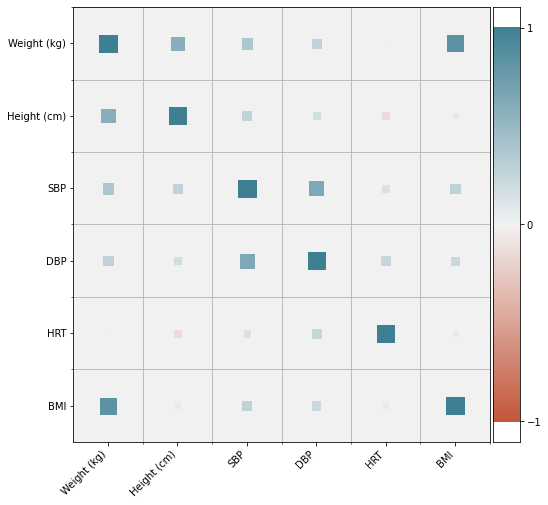

In [ ]:
#Step 3: Using High Correlation to drop columns that are not necessary for the research
!pip install heatmapz

from heatmap import heatmap, corrplot
import matplotlib.pyplot as plt

#Create Correlation matrix plot
plt.figure(figsize=(8, 8))
corrplot(new_df.corr(), size_scale=300);

In [ ]:
#Step 4: Since Height and Weight are highly correlated with BMI, Height and Weight columns will be dropped
final_df = new_df.drop(['Height (cm)', 'Weight (kg)'], axis=1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      4184 non-null   object 
 1   Gender   4184 non-null   object 
 2   SBP      3032 non-null   float64
 3   DBP      3111 non-null   float64
 4   POH      2650 non-null   object 
 5   HRT      3798 non-null   float64
 6   AHR      3798 non-null   object 
 7   Anxiety  4184 non-null   object 
 8   BMI      3994 non-null   float64
dtypes: float64(4), object(5)
memory usage: 294.3+ KB


# Data Preprocessing

In [ ]:
#Imputing missing values in numeric and nominal columns with mean and mode

#Filling with mean
numerical_col = ['BMI',
                 'SBP', 
                 'DBP',
                 'HRT']

def fill_numerical_with_mean():
    for column in numerical_col:
        final_df[column].fillna(final_df[column].mean(), inplace=True)

#Filling with mode
nominal_col = ['POH', 
                'HRT', 'AHR']

def fill_nominal_with_mode():
  for column in nominal_col:
    final_df[column].fillna(final_df[column].mode()[0], inplace=True)

#Displaying data for the new data frame
fill_numerical_with_mean()
fill_nominal_with_mode()

#Checking if the final dataframe has any missing values
final_df.isnull().sum()/len(final_df)*100

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      4184 non-null   object 
 1   Gender   4184 non-null   object 
 2   SBP      4184 non-null   float64
 3   DBP      4184 non-null   float64
 4   POH      4184 non-null   object 
 5   HRT      4184 non-null   float64
 6   AHR      4184 non-null   object 
 7   Anxiety  4184 non-null   object 
 8   BMI      4184 non-null   float64
dtypes: float64(4), object(5)
memory usage: 294.3+ KB


In [ ]:
#Once again checking whether there are any missing values in the final dataframe
print("Missing Values : %s", final_df.isnull().sum()/len(final_df)*100)

Missing Values : %s Age        0.0
Gender     0.0
SBP        0.0
DBP        0.0
POH        0.0
HRT        0.0
AHR        0.0
Anxiety    0.0
BMI        0.0
dtype: float64


In [ ]:
# Performing OneHot Encoding of remaining columns

from sklearn.pipeline import Pipeline

#Finding out how many categories need to be fixed
top_5 = [x for x in final_df.Age.value_counts().sort_values(ascending=False).head(5).index]
top_5

['18', '20 and more', '19', 'less 18']

In [ ]:
#Fixing categorical variables in Age
fixed_age = {'18': 'eighteen', '20 and more': 'twenty_and_more', '19' : 'nineteen', 'less 18' : 'less_eighteen'}
final_df['Age'] = final_df['Age'].map(lambda s: fixed_age[s])

final_df

,Age,Gender,SBP,DBP,POH,HRT,AHR,Anxiety,BMI
0,twenty_and_more,female,11.368206,6.00000,no,75.000000,no,no,22.773186
1,nineteen,female,10.000000,5.00000,no,65.000000,no,no,19.723183
2,twenty_and_more,female,11.000000,7.00000,no,65.000000,no,no,22.060686
3,nineteen,female,11.000000,8.00000,no,70.000000,no,no,22.819405
4,eighteen,female,10.000000,6.00000,no,73.649552,no,no,15.817291
...,...,...,...,...,...,...,...,...,...
4179,nineteen,male,12.000000,8.00000,no,68.000000,no,no,20.756387
4180,eighteen,male,12.000000,8.00000,no,80.000000,no,no,19.753086
4181,nineteen,female,12.000000,7.00000,no,70.000000,no,no,20.195578
4182,twenty_and_more,male,11.000000,6.74603,no,81.000000,no,no,15.703832


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


num_features = final_df.columns.difference(['Gender',
                                            'Age',
                                            'POH',
                                            'AHR',
                                            'Anxiety']).tolist()
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

num_transformer

# Add one hot encoding
cat_features = ['Gender',
                'POH', 
                'Age',
                'AHR']
cat_transformer = Pipeline(steps=[('onehotencoding', OneHotEncoder(sparse=False))])

preprocessing = ColumnTransformer(transformers=[
                    ('num', num_transformer, num_features),
                    ('cat', cat_transformer, cat_features)
])

cleanup_feats = {"Age" : {"less_eighteen" : 0, "eighteen" : 1, "nineteen" : 2, "twenty_and_more" : 3},
                 "Gender": {"male" : 0, "female" : 1},
                 "POH" : {"yes" : 1, "no" : 0},
                 "AHR" : {"yes" : 1, "no" : 0},
                 "Anxiety" : {"yes" : 1, "no" : 0}}

final_df = final_df.replace(cleanup_feats)
final_df

,Age,Gender,SBP,DBP,POH,HRT,AHR,Anxiety,BMI
0,3,1,11.368206,6.00000,0,75.000000,0,0,22.773186
1,2,1,10.000000,5.00000,0,65.000000,0,0,19.723183
2,3,1,11.000000,7.00000,0,65.000000,0,0,22.060686
3,2,1,11.000000,8.00000,0,70.000000,0,0,22.819405
4,1,1,10.000000,6.00000,0,73.649552,0,0,15.817291
...,...,...,...,...,...,...,...,...,...
4179,2,0,12.000000,8.00000,0,68.000000,0,0,20.756387
4180,1,0,12.000000,8.00000,0,80.000000,0,0,19.753086
4181,2,1,12.000000,7.00000,0,70.000000,0,0,20.195578
4182,3,0,11.000000,6.74603,0,81.000000,0,0,15.703832


In [ ]:
#Finding out number of "Yes" and "Nos" in the target, "Anxiety" column
final_df['Anxiety'].value_counts()

0    3867
1     317
Name: Anxiety, dtype: int64

In [ ]:
final_df['Anxiety'].describe()

count    4184.000000
mean        0.075765
std         0.264653
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Anxiety, dtype: float64

In [ ]:
from imblearn.over_sampling._smote.base import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#Getting the target column anad the features
X = final_df.drop(['Anxiety'], axis=1)
y = final_df['Anxiety']

#Balancing the data before trying out the fits
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
counter_x = Counter(X)
for k, v in counter.items():
  dist = v / len(y) * 100
  print(f"Class = {k}, n = {v} ({dist}%)")

Class = 0, n = 3867 (50.0%)
Class = 1, n = 3867 (50.0%)


# Data Analysis


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# to make this notebook's output stable across runs (reproducible results)
np.random.seed(123)

newlist_C_updated = [2**i for i in range(-5, 17, 2)]
newlist_gamma_updated = [2**x for x in range(-15, 5, 2)]

#Fitting the data
clf_params = [{
    'clf' : [LogisticRegression()]
},{
    'clf' : [RandomForestClassifier()],
    'clf__n_estimators' : [10, 20, 30, 50, 100]
},{
    'clf' : [KNeighborsClassifier()],
    'clf__n_neighbors' : [i for i in range(3,10,2)]
},
{
    'clf' : [DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)]
},
{
    'clf' : [SVC()]
}]

# Start pipeline with the preproccessor and Logisitic Regression
pipeline = Pipeline(steps=[('preproccessor', preprocessing), ('clf', LogisticRegression())])
gscv = GridSearchCV(pipeline, param_grid=clf_params, verbose=2, n_jobs=-1, scoring="f1", cv=5)
gscv.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproccessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['BMI',
                                                                          'DBP',
                                                                          'HRT',
                                                                          'SBP']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehotencoding',
                                                                                          OneHotEncoder(sparse=False))]

In [ ]:
# Find best estimator/model 
best_estimator = gscv.best_estimator_
y_pred = best_estimator.predict(X)

print(f"Best Estimator: {best_estimator}")

Best Estimator: Pipeline(steps=[('preproccessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['BMI', 'DBP', 'HRT', 'SBP']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoding',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'POH', 'Age',
                                                   'AHR'])])),
                ('clf', RandomForestClassifier())])


# Testing and Training the Model with Selected Features

Anxiety data: mean=0.497 stdv=0.500
Heart rate data: mean=74.159 stdv=10.713
SBP data: mean=11.302 stdv=0.910
DBP data: mean=6.721 stdv=0.761
BMI data: mean=22.092 stdv=3.356


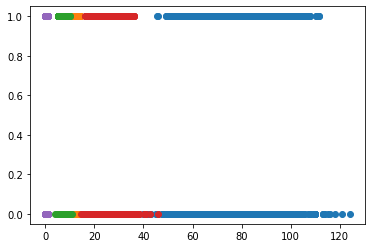

PointBiserial Correlation For Heart Rate: 0.063
PointBiserial Correlation For SBP: -0.104
PointBiserial Correlation For DBP: -0.044


In [ ]:
import scipy.stats as stats
from scipy.stats.stats import pointbiserialr

#Finding correlation between selected features
#Establishing correlation coefficient between blood pressure and anxiety 
from numpy import mean
from numpy import std

# Create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=100)

data_anxiety = y_train

data_hrt = X_train['HRT']
data_sbp = X_train['SBP']
data_dbp = X_train['DBP']
data_bmi = X_train['BMI']
data_gender = X_train['Gender']

print('Anxiety data: mean=%.3f stdv=%.3f' % (mean(data_anxiety), std(data_anxiety)))

print('Heart rate data: mean=%.3f stdv=%.3f' % (mean(data_hrt), std(data_hrt)))
print('SBP data: mean=%.3f stdv=%.3f' % (mean(data_sbp), std(data_sbp)))
print('DBP data: mean=%.3f stdv=%.3f' % (mean(data_dbp), std(data_dbp)))
print('BMI data: mean=%.3f stdv=%.3f' % (mean(data_bmi), std(data_bmi)))

from matplotlib import pyplot
pyplot.scatter(data_hrt, data_anxiety)
pyplot.scatter(data_sbp, data_anxiety)
pyplot.scatter(data_dbp, data_anxiety)
pyplot.scatter(data_bmi, data_anxiety)
pyplot.scatter(data_gender, data_anxiety)
pyplot.show()

#Printing the covariance matrix
from numpy import cov
# calculate covariance matrix

covariance1 = cov(data_anxiety, data_hrt)
#print(covariance1, '\n')

#Calculating correlation coefficient
from scipy.stats import pearsonr
corr2 = np.corrcoef(data_hrt, data_anxiety)
#print(corr2)

corrHrt, _ = pointbiserialr(data_anxiety, data_hrt)
print('PointBiserial Correlation For Heart Rate: %.3f' % corrHrt)

corrSbp, _ = pointbiserialr(data_anxiety, data_sbp)
print('PointBiserial Correlation For SBP: %.3f' % corrSbp)

corrDbp, _ = pointbiserialr(data_anxiety, data_dbp)
print('PointBiserial Correlation For DBP: %.3f' % corrDbp)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Create the Random Forest Classifier model and fit the data
rfc_model = RandomForestClassifier(n_estimators=50)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

 1) DBP                            0.265780
 2) POH                            0.231733
 3) BMI                            0.228036
 4) AHR                            0.182515
 5) Gender                         0.052197
 6) SBP                            0.022083
 7) HRT                            0.011383
 8) Anxiety                        0.006274


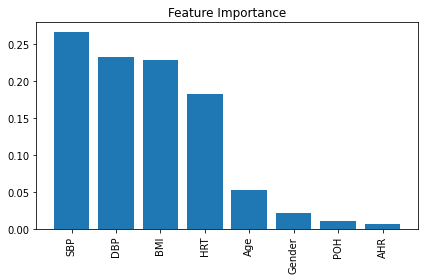

In [ ]:
#Plotting feature importance
importances = rfc_model.feature_importances_


sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = final_df.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

#Plotting the feature importances obtained from above
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

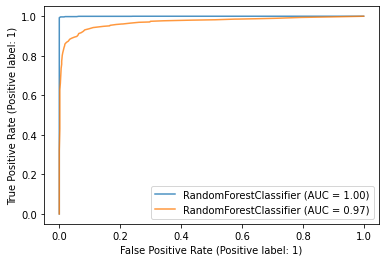

In [ ]:
#Plotting the ROC Curve for RFC model 
#Same code was used for other models when plotting the ROC-AUC curve

from sklearn.metrics import RocCurveDisplay

ax = plt.gca()

#Training set ROC curve
rfc_disp_train = RocCurveDisplay.from_estimator(rfc_model, X_train, y_train, ax=ax, alpha=0.8)

#Test set ROC curve
rfc_disp = RocCurveDisplay.from_estimator(rfc_model, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

# Predictions

In [ ]:
#Predicting the fitted data
y_pred = rfc_model.predict(X_test)

y_pred

#Predicting on decision tree classifier
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1146
           1       0.96      0.89      0.92      1175

    accuracy                           0.92      2321
   macro avg       0.93      0.92      0.92      2321
weighted avg       0.93      0.92      0.92      2321



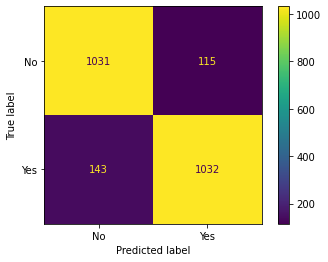

In [ ]:
print(classification_report(y_test, y_pred))
import sklearn.metrics as metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No', 'Yes'])
cm_display.plot()
plt.show()


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score

for i in range(2, 100, 2): 
  threshold = i/100
  y_pred_thres = (rfc_model.predict_proba(X_test)[:, 1] > threshold).astype('float')
  print(threshold)
  print(confusion_matrix)
  print('Recall :', round(recall_score(y_test, y_pred_thres), 4))
  print('Accuracy :', round(accuracy_score(y_test, y_pred_thres), 4))
  print('Balanced Accuracy :', round(balanced_accuracy_score(y_test, y_pred_thres), 4))
  print('f1-Score : ', round(f1_score(y_test, y_pred_thres), 4))
  print('--------------------------------')

0.02
[[1031  115]
 [ 143 1032]]
Recall : 0.994
Accuracy : 0.604
Balanced Accuracy : 0.5991
f1-Score :  0.7177
--------------------------------
0.04
[[1031  115]
 [ 143 1032]]
Recall : 0.9898
Accuracy : 0.642
Balanced Accuracy : 0.6376
f1-Score :  0.7368
--------------------------------
0.06
[[1031  115]
 [ 143 1032]]
Recall : 0.9872
Accuracy : 0.676
Balanced Accuracy : 0.6721
f1-Score :  0.7552
--------------------------------
0.08
[[1031  115]
 [ 143 1032]]
Recall : 0.9855
Accuracy : 0.7044
Balanced Accuracy : 0.7009
f1-Score :  0.7715
--------------------------------
0.1
[[1031  115]
 [ 143 1032]]
Recall : 0.9821
Accuracy : 0.7385
Balanced Accuracy : 0.7354
f1-Score :  0.7918
--------------------------------
0.12
[[1031  115]
 [ 143 1032]]
Recall : 0.9804
Accuracy : 0.7712
Balanced Accuracy : 0.7686
f1-Score :  0.8127
--------------------------------
0.14
[[1031  115]
 [ 143 1032]]
Recall : 0.9787
Accuracy : 0.7966
Balanced Accuracy : 0.7943
f1-Score :  0.8297
-----------------------

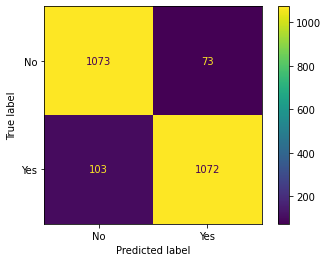

In [ ]:
# Selecting the best threshold to lower the False positive and negative rates
threshold = 0.44
y_pred_thres = (rfc_model.predict_proba(X_test)[:, 1] > threshold).astype('float')
confusion_matrix_thres = metrics.confusion_matrix(y_test, y_pred_thres)
cm_display_thres = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_thres, display_labels = ['No', 'Yes'])
cm_display_thres.plot()
plt.show()

In [ ]:
#use model to predict probability that given y value is 1
y_pred_proba = rfc_model.predict_proba(X_test)[::,1]
#print(y_pred_proba)

#calculate AUC of model
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#print AUC score
print('Area Under Curve(AUC) :', auc)

Area Under Curve(AUC) : 0.970529872637481


In [ ]:
#Discovering TP, TN, FP, FN from the confusion matrix
final_df_cm = confusion_matrix_thres

TN, FP, FN, TP = final_df_cm.ravel()

print("TP: ", TP)
print("TN: ", TN)
print("FP: ", FP)
print("FN: ", FN)

TP:  1072
TN:  1073
FP:  73
FN:  103


In [ ]:
import math

#Computing different values
# Sensitivity, hit rate, recall, or true positive rate
TPR = round(TP/(TP+FN), 4)
print('TPR :', TPR)
# Specificity or true negative rate
TNR = round(TN/(TN+FP), 4) 
print('TNR :', TNR)
# Precision or positive predictive value
PPV = round(TP/(TP+FP), 4)
print('PPV :', PPV)
# Fall out or false positive rate
FPR = round(FP/(FP+TN), 4)
print('FPR :', FPR)
# False negative rate
FNR = round(FN/(TP+FN), 4)
print('FNR :', FNR) 

# Overall accuracy
ACC = round ((TP+TN)/(TP+FP+FN+TN), 4)
print('ACC :', ACC)

TPR : 0.9123
TNR : 0.9363
PPV : 0.9362
FPR : 0.0637
FNR : 0.0877
ACC : 0.9242


In [ ]:
print('Recall :', round(recall_score(y_test, y_pred_thres), 4))
print('Accuracy :', round(accuracy_score(y_test, y_pred_thres), 4))
print('Balanced Accuracy :', round(balanced_accuracy_score(y_test, y_pred_thres), 4))
print('f1-Score : ', round(f1_score(y_test, y_pred_thres), 4))

Recall : 0.9123
Accuracy : 0.9242
Balanced Accuracy : 0.9243
f1-Score :  0.9241


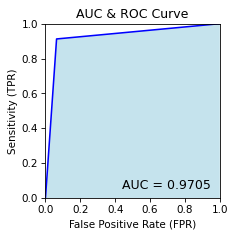

In [ ]:
#For ROC-AUC curve detail
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred_thres)

plt.figure(figsize=(3, 5), dpi=75)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'b')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, color='black')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("Sensitivity (TPR)")
plt.show()